In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from universal.algos import *
import datetime as dt

In [2]:
class PyCrypto(CRP) :
    
    def run(self,y,m,d):
        #d = int(input('Entrer le jour que vous voulez :'))
        #m = int(input('Entrer le mois que vous voulez :'))
        #y = int(input("Entrer l'année que vous voulez :"))
        pred = pd.read_csv('X_val_pred.csv', parse_dates = [0], index_col = 0)
        pred = pred.rename(columns= {'0' : 'prédiction'})
        S = pd.read_csv('année_2022_full_DF.csv', parse_dates = [0], index_col = 0)
        T = S.copy()[[]]
        T['prédiction'] = pred
        T = T.fillna(method = 'ffill')
        T = T['2022-01-30':]  
        # Selection close
        col = [ ]
        for e in S.columns :
            if 'Close' in e :
                col.append(e)
        S = S[col]
        # Création dataset
        R = S / S.shift(1)
        highest_return_symbol = R.idxmax(axis=1).shift(1)
        lower_return_symbol = R.idxmin(axis=1).shift(1)
    
        # lancement algos
        if (T[dt.datetime(y,m,d):dt.datetime(y,m,d)]['prédiction'] == 2).bool():
            S = S[dt.datetime(y,m,d) : dt.datetime(y,m,d)+dt.timedelta(days = 20)]
            W_mom = S * 0
            for col in R.columns:
                W_mom.loc[highest_return_symbol == col, col] = 1
            algo = CRP(W_mom)
            result = algo.run(S)
            #r_mom = result.r_log
            return result
        elif (T[dt.datetime(y,m,d):dt.datetime(y,m,d)]['prédiction'] == 1).bool():
            S = S[dt.datetime(y,m,d) : dt.datetime(y,m,d)+dt.timedelta(days = 20)]
            W_rev = S * 0
            for col in R.columns:
                W_rev.loc[lower_return_symbol == col, col] = 1
            algo = CRP(W_rev)
            result = algo.run(S)
            #r_rev = result.r_log 
            return result
        else :
            print("Pas d'investissement")

[<AxesSubplot:xlabel='Date', ylabel='Total wealth'>,
 <AxesSubplot:xlabel='Date', ylabel='weights'>]

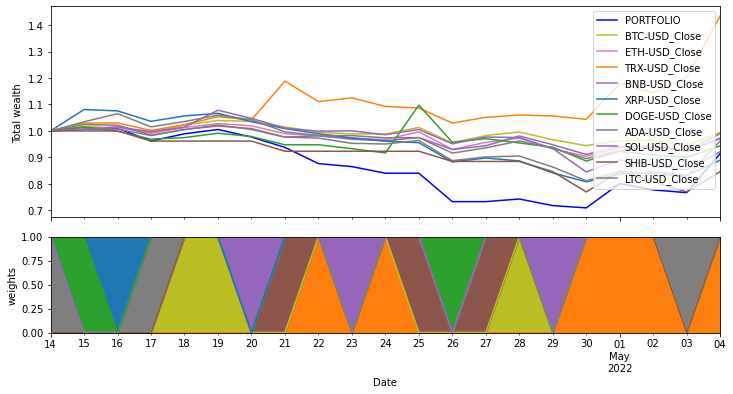

In [3]:
r = PyCrypto()
res = r.run(2022,4,14)
res.plot()

In [36]:
res.weights

,BTC-USD_Close,ETH-USD_Close,TRX-USD_Close,BNB-USD_Close,XRP-USD_Close,DOGE-USD_Close,ADA-USD_Close,SOL-USD_Close,SHIB-USD_Close,LTC-USD_Close
Date,,,,,,,,,,
2022-04-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-04-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-04-16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-04-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-04-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-04-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-04-22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
res.sharpe

-0.7163067625717439